Team Name: Allies
Team members: Girija Kondapally
              Manasa Cherukupally
              Durga Phani Vikas Telu
              Shiva Chttimalla
              Rahil Mohammed Zuhair

When we observed the given data, we felt that a linear regression model would be a good fit for this data. But when we implemented it, we got a residual error. To overcome this error, we implemented gradient boosting regression with the residual error, through which we got a root mean square error (RMSE) of 3.919546825723649 without normalizing the data and (RMSE) of 3.8488665190657674 with normalized data which is slighlty better than unnormalized data.

The below given links were some of the references we went through

https://realpython.com/linear-regression-in-python/
https://blog.paperspace.com/implementing-gradient-boosting-regression-python/
https://vitalflux.com/gradient-boosting-regression-python-examples/

Loading the dataset. The dataset consist of columns Id, Density, BodyFat, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist and 168 rows in the training dataset

In [2]:
import pandas as pd
df=pd.read_csv("bodyfat-comp.csv")
print(df.describe())

          Density     BodyFat         Age      Weight      Height        Neck  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     1.055817   18.994048   44.720238  177.323214   70.053571   37.961310   
std      0.018204    8.098242   12.691610   25.441979    4.061756    2.192801   
min      0.995000    3.000000   22.000000  127.500000   29.500000   31.100000   
25%      1.041550   12.175000   35.000000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  174.125000   70.000000   37.900000   
75%      1.071000   25.225000   54.000000  195.250000   72.250000   39.325000   
max      1.092600   47.500000   72.000000  244.250000   77.500000   43.900000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean   100.194643   91.944048   99.618452   59.279167   38.470833   23.057143   
std      7.666736    9.7475

In [3]:
#sample data
print(df.head(10))

         Id  Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen  \
0   Person2   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   
1   Person3   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   
2   Person4   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4   
3   Person6   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4   
4   Person7   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7   
5   Person8   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   
6   Person9   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   
7  Person10   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6   
8  Person11   1.0830      7.1   26  186.25   74.50  38.5  101.5     83.6   
9  Person13   1.0513     20.8   32  180.50   69.50  38.4  102.0     91.6   

     Hip  Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0   98.7   58.7  37.3   23.4    30.5     28.9   18.2  
1   99.2   59.6  38.9   24.0    28.8     25.2   16.6 

In [4]:
df.shape

(168, 16)

Testing dataset consists of columns Id, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist and 84 rows

In [6]:
df_test=pd.read_csv("bodyfat-validate.csv")
print(df_test.describe())

             Age      Weight     Height       Neck       Chest     Abdomen  \
count  84.000000   84.000000  84.000000  84.000000   84.000000   84.000000   
mean   45.214286  182.126786  70.339286  38.053571  102.083333   93.779762   
std    12.490065   35.972563   2.706152   2.861815    9.708695   12.576875   
min    23.000000  118.500000  64.000000  31.500000   79.300000   69.400000   
25%    38.500000  159.375000  68.250000  36.275000   95.725000   85.800000   
50%    43.500000  177.750000  70.375000  38.000000  100.150000   92.400000   
75%    54.000000  200.625000  72.250000  40.050000  107.450000  100.125000   
max    81.000000  363.150000  77.750000  51.200000  136.200000  148.100000   

              Hip      Thigh       Knee      Ankle     Biceps    Forearm  \
count   84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean   100.477381  59.659524  38.829762  23.192857  32.427381  28.678571   
std      8.829105   6.247546   2.662537   2.024178   3.486959   2.170

In [7]:
#sample data
print(df_test.head(10))

          Id  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   Person68   55  154.75   71.50  36.9   95.4     86.6   91.8   54.3  35.4   
1  Person252   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   
2  Person232   57  182.25   71.75  39.4  103.4     96.7  100.7   59.3  38.6   
3  Person162   33  196.00   73.00  38.5  103.8     95.6  105.1   61.4  40.6   
4   Person92   44  179.75   69.50  39.2  101.9     93.2  100.6   58.9  39.7   
5  Person226   55  126.50   66.75  33.4   88.8     78.2   87.5   50.8  33.0   
6   Person59   54  202.50   70.75  40.5  115.4    105.3   97.0   59.1  38.0   
7  Person251   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
8  Person181   39  219.25   74.25  40.0  108.5    104.6  109.8   68.1  42.8   
9    Person5   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.5    32.8     27.4   18.7  
1   24.6    33.7     30.0   20.9  
2   22.8    31.8     29.1

Preprocessing the data by removing missing values and unwanted columns like Id. Density column from the dataset is removed since the column is not available in the testing dataset.

In [8]:
# Count missing values in each column
missing_value_counts = df.isna().sum()

# Print column name and missing value count
print("Column Name\tMissing Value Count")
for column_name, count in missing_value_counts.items():
    print(f"{column_name}\t\t{count}")

Column Name	Missing Value Count
Id		0
Density		0
BodyFat		0
Age		0
Weight		0
Height		0
Neck		0
Chest		0
Abdomen		0
Hip		0
Thigh		0
Knee		0
Ankle		0
Biceps		0
Forearm		0
Wrist		0


In [9]:
df.drop(['Id', 'Density'], axis=1, inplace=True)

df_test.drop('Id', axis=1, inplace=True)

Intial visualization to check correlation between columns and the data distribution

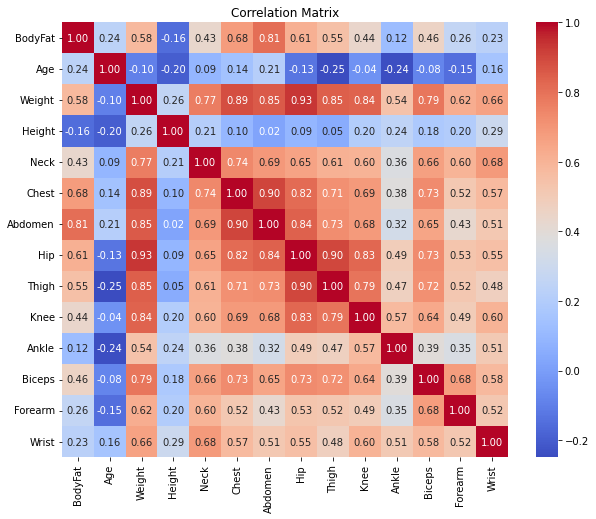

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")

# Set the title and show the plot
plt.title("Correlation Matrix")
plt.show()

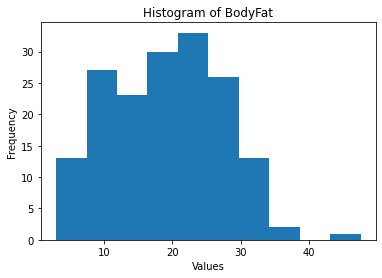

In [11]:
import matplotlib.pyplot as plt

# Create a histogram for a column in the DataFrame
column_name = "BodyFat"  
plt.hist(df[column_name], bins=10)  

# Set title and labels for the histogram
plt.title("Histogram of {}".format(column_name))
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

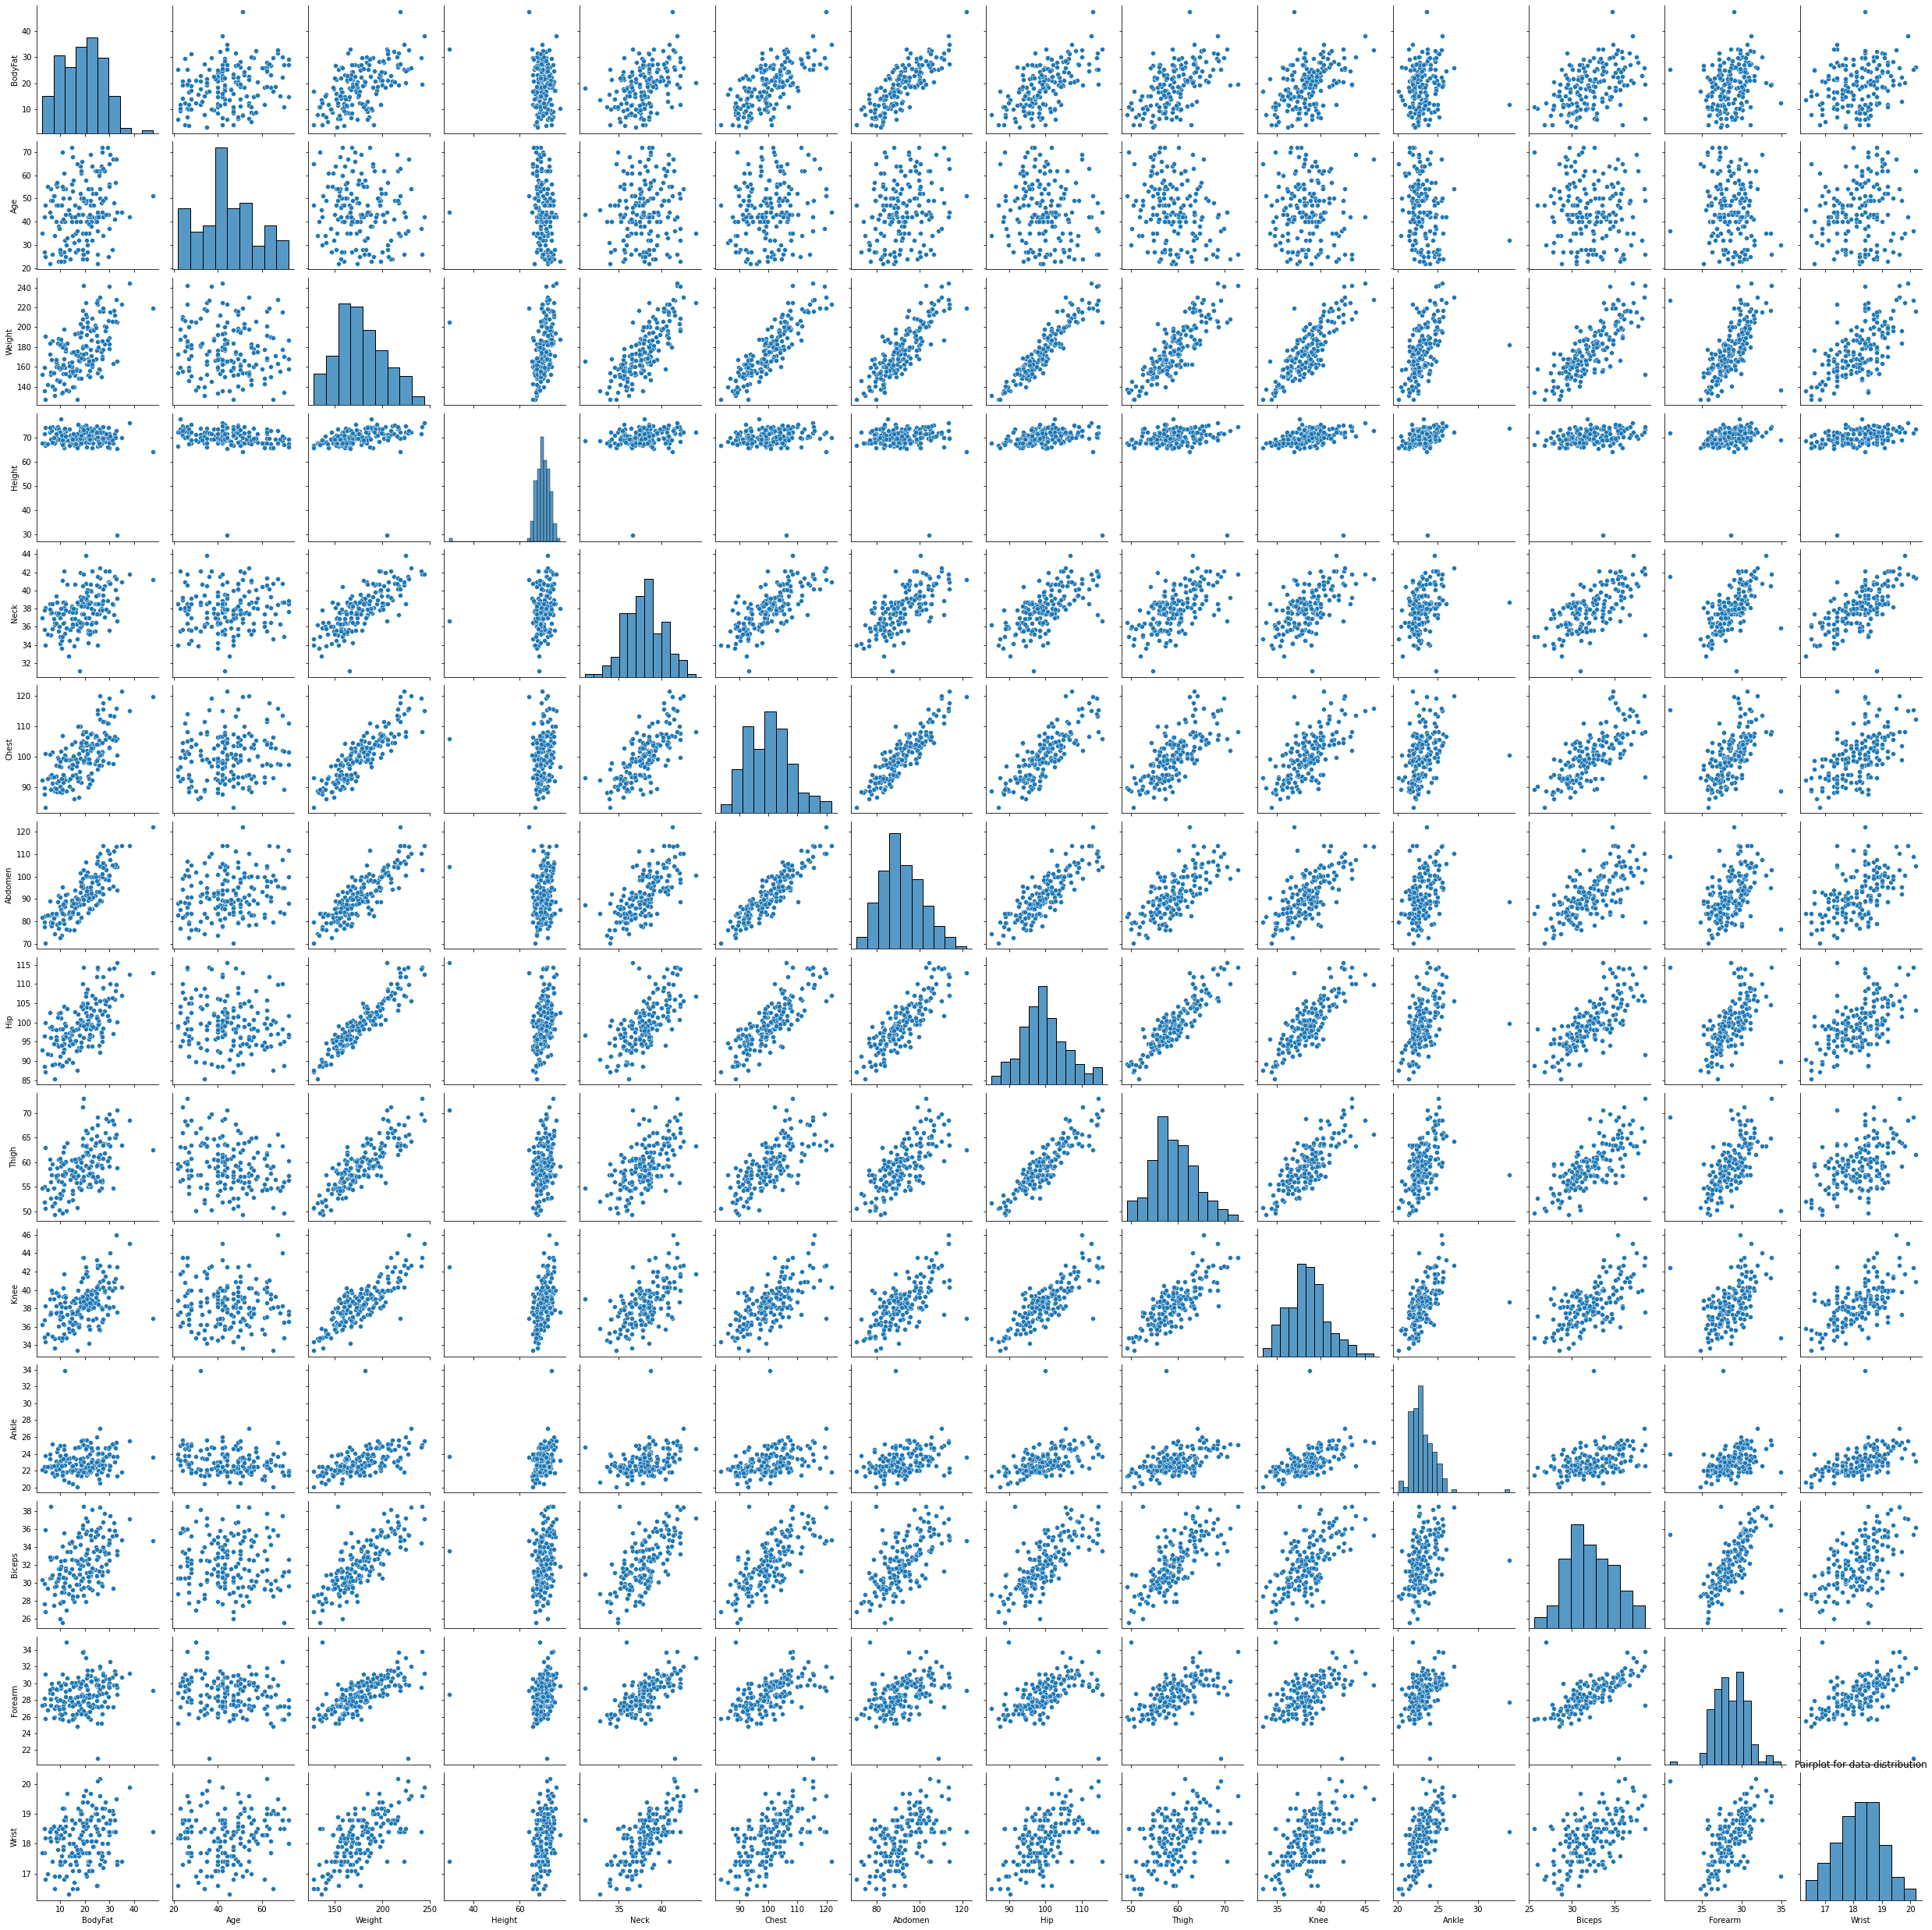

In [14]:
# Create a pairplot
sns.pairplot(df)
plt.title("Pairplot for data distribution")
# Show the plot
plt.show()

Splitting the data into train and test

In [15]:
from sklearn.linear_model import LinearRegression
y=df['BodyFat']
X=df.drop('BodyFat', axis=1)
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Applying the linear regression model 

In [16]:
# Create an instance of the LinearRegression class
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE): ", rmse)

r2 = r2_score(y_val, y_pred)
print("R2 score:", r2)

Root Mean Squared Error (RMSE):  4.476350302764731
R2 score: 0.6738688538154018


Visualizing the model using pairplot

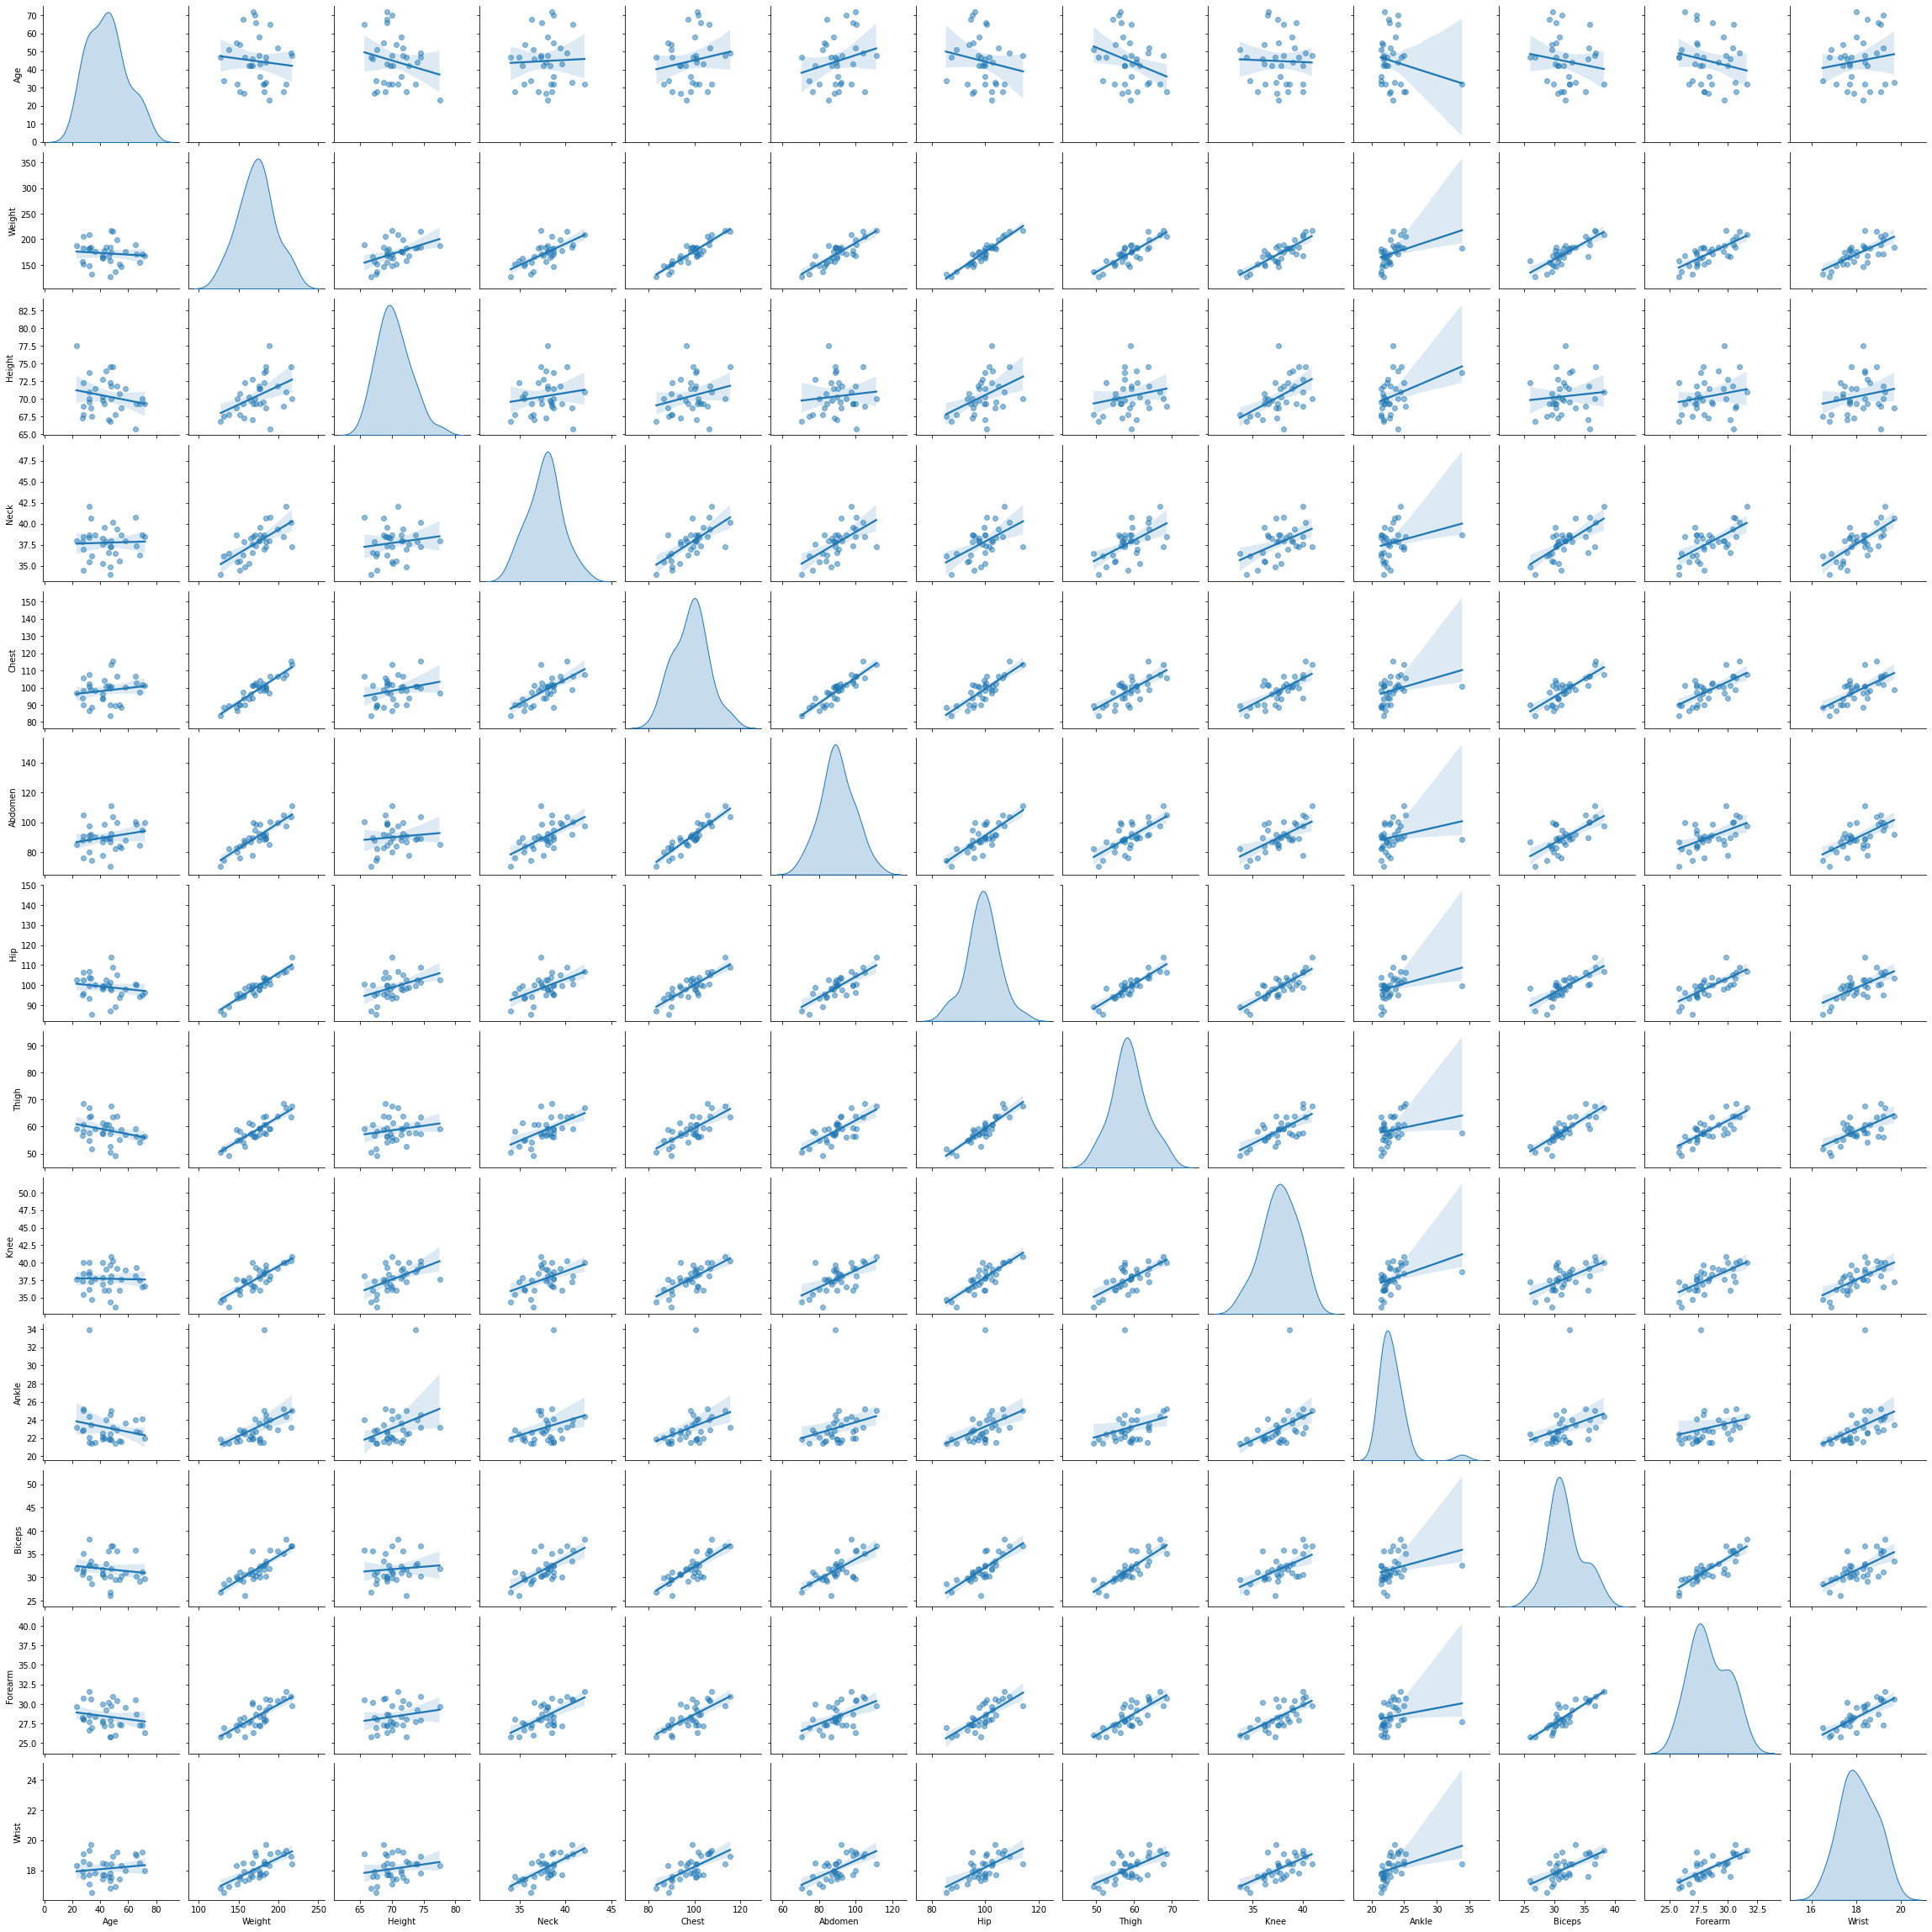

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with scatter plots and regression lines for the linear regression model
sns.pairplot(X_val, diag_kind='kde', markers='o', plot_kws={'scatter_kws': {'alpha': 0.5}}, height=2.5, kind='reg')

# Display the plot
plt.show()

Applying gradient boosting Regression with residuals generated from the linear regression model to increase the model performance

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
linear_reg = LinearRegression()

# Fit Linear Regression model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the training data to obtain residuals
residuals_train = y_train - linear_reg.predict(X_train)

# Initialize Gradient Boosting model
n_estimators = 100  # boosting stages
learning_rate = 0.3 # learning rate 
gbm = GradientBoostingRegressor(n_estimators=n_estimators,
                                learning_rate=learning_rate,
                                random_state=42)

# Train the Gradient Boosting model on the residuals
gbm.fit(X_train, residuals_train)

# Predict on the testing data
y_pred = linear_reg.predict(X_val) + gbm.predict(X_val)


mse = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_val, y_pred)
print("R2 score:", r2)

Root Mean Squared Error (RMSE): 3.919546825723649
R2 score: 0.7499563325118812


In [19]:
#apply model on the testing data
X_test = df_test
print(X_test.shape)

y_test_pred=linear_reg.predict(X_test) + gbm.predict(X_test)

print(y_test_pred)

(84, 13)
[15.49302961 23.43577086 21.95673632 15.58123219 18.27426702 13.75450927
 25.87867714 20.19906059 23.57341995 28.57578348 31.18642171 22.63687355
 18.52018716 13.29602714  9.33544356 21.33450831 17.82042545 10.5022643
 21.5794396  12.32085466 19.35109658 34.56884202 21.31383432 30.28684124
 20.33362295 14.64033519 21.31086183 33.13694968 50.03155629 11.22963144
 21.5468017  13.05201627 23.83285522 10.98561342 16.44271215 20.2879136
 30.96859825 11.74338644 14.4716197   5.86547174 17.87920549 25.10379824
 21.03782667 20.10803814 23.47434887 19.99186839 40.67688862 16.03009073
 13.71747269 18.99685883 21.88455067 20.92782441 19.40626324 12.85477639
 11.93590193 11.22275384 19.73701388  6.86683915 24.985657   20.33460482
  8.54922927 12.46464937 17.03315278 24.12236998 11.310883   22.50521189
 42.22070915 38.96508617 17.84170718 13.36266041 13.82956791 29.52776985
 13.93371554 20.68466691 25.26305607 26.63233885 12.42666916 27.13013022
 16.9710304  25.63456308 21.83588143 24.9994

Visualization of data distributed for testing dataset

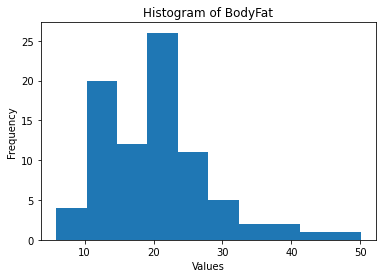

In [22]:
import matplotlib.pyplot as plt

# Create a histogram for a column in the DataFrame
column_name = "BodyFat" 
plt.hist(y_test_pred, bins=10) 
# Set title and labels for the histogram
plt.title("Histogram of {}".format(column_name))
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

Normalize the data and apply the model on the normalized data

In [23]:
def min_max_scaling(data):
    if data.dtype in ['int64', 'float64']:  # Filter out non-numeric columns
        return (data - data.min()) / (data.max() - data.min())
    else:
        return data

# Normalize data in each column using Min-Max scaling
normalized_df = df.apply(min_max_scaling)

# Print the normalized DataFrame
print("Normalized DataFrame:")
normalized_df

Normalized DataFrame:


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.069663,0.00,0.391863,0.890625,0.578125,0.267016,0.243714,0.443709,0.398305,0.309524,0.239130,0.379845,0.568345,0.487179
1,0.501124,0.00,0.226981,0.765625,0.226562,0.324607,0.338491,0.460265,0.436441,0.436508,0.282609,0.248062,0.302158,0.076923
2,0.166292,0.08,0.490364,0.890625,0.492187,0.481675,0.309478,0.526490,0.457627,0.309524,0.195652,0.527132,0.604317,0.487179
3,0.402247,0.04,0.708779,0.942708,0.617188,0.552356,0.464217,0.745033,0.707627,0.682540,0.398551,0.782946,0.690647,0.641026
4,0.364045,0.08,0.458244,0.838542,0.414062,0.568063,0.392650,0.496689,0.385593,0.388889,0.202899,0.488372,0.489209,0.358974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.665169,0.90,0.858672,0.901042,0.796875,0.848168,0.831721,0.811258,0.690678,1.000000,0.384058,0.751938,0.633094,0.820513
164,0.274157,0.92,0.239829,0.828125,0.406250,0.366492,0.268859,0.301325,0.211864,0.325397,0.181159,0.279070,0.453237,0.564103
165,0.611236,0.94,0.753747,0.854167,0.757812,0.793194,0.719536,0.817881,0.593220,0.841270,0.181159,0.922481,0.834532,0.641026
166,0.179775,0.96,0.057816,0.781250,0.296875,0.151832,0.255319,0.115894,0.012712,0.111111,0.101449,0.000000,0.338129,0.564103


In [24]:
# Normalize data in each column using Min-Max scaling
normalized_df_test = df_test.apply(min_max_scaling)

# Print the normalized DataFrame
print("Normalized DataFrame:")
normalized_df_test

Normalized DataFrame:


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.551724,0.148171,0.545455,0.274112,0.282953,0.218551,0.108453,0.177057,0.149068,0.164384,0.396040,0.500000,0.517857
1,0.879310,0.363785,0.436364,0.472081,0.581722,0.496823,0.352472,0.301746,0.571429,0.376712,0.440594,0.740741,0.910714
2,0.586207,0.260576,0.563636,0.401015,0.423550,0.346887,0.250399,0.301746,0.347826,0.253425,0.346535,0.657407,0.571429
3,0.172414,0.316779,0.654545,0.355330,0.430580,0.332910,0.320574,0.354115,0.472050,0.404110,0.321782,0.666667,0.589286
4,0.362069,0.250358,0.400000,0.390863,0.397188,0.302414,0.248804,0.291771,0.416149,0.273973,0.326733,0.592593,0.535714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.413793,0.312692,0.618182,0.441624,0.411248,0.405337,0.266348,0.336658,0.397516,0.287671,0.589109,0.888889,0.464286
80,0.396552,0.239117,0.436364,0.289340,0.358524,0.332910,0.274322,0.276808,0.322981,0.232877,0.212871,0.527778,0.339286
81,0.206897,0.283057,0.400000,0.456853,0.386643,0.343075,0.240829,0.543641,0.372671,0.273973,0.559406,0.787037,0.428571
82,0.137931,0.240139,0.545455,0.238579,0.383128,0.292249,0.228070,0.304239,0.372671,0.376712,0.262376,0.574074,0.428571


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y=df['BodyFat']
X=df.drop('BodyFat', axis=1)
X_test=df_test

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_val_scaled = scaler.transform(X_val)

linear_reg = LinearRegression()


linear_reg.fit(X_train_scaled, y_train)


y_pred = linear_reg.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


r2 = r2_score(y_val, y_pred)
print("R2 score:", r2)

Root Mean Squared Error (RMSE): 4.47635030276474
R2 score: 0.6738688538154004


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
linear_reg = LinearRegression()

# Fit Linear Regression model on the training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the training data to obtain residuals
residuals_train = y_train - linear_reg.predict(X_train_scaled)

# Initialize Gradient Boosting model
n_estimators = 100  # boosting stages 
learning_rate = 0.3 # learning rate
gbm = GradientBoostingRegressor(n_estimators=n_estimators,
                                learning_rate=learning_rate,
                                random_state=42)

# Train the Gradient Boosting model on the residuals
gbm.fit(X_train_scaled, residuals_train)

# Predict on the testing data
y_pred = linear_reg.predict(X_val_scaled) + gbm.predict(X_val_scaled)

# Calculate Mean Squared Error (MSE) as evaluation metric
mse = mean_squared_error(y_val, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


r2 = r2_score(y_val, y_pred)
print("R2 score:", r2)

Root Mean Squared Error (RMSE): 3.8488665190657674
R2 score: 0.7588929855416123


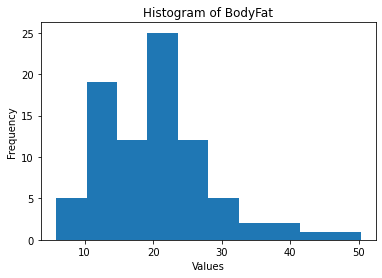

In [30]:
# Transform the testing data
X_test_scaled = scaler.transform(df_test)
# Predict on the testing data
y_test_pred_scaled = linear_reg.predict(X_test_scaled) + gbm.predict(X_test_scaled)

import matplotlib.pyplot as plt

# Create a histogram for a column in the DataFrame
column_name = "BodyFat" 
plt.hist(y_test_pred_scaled, bins=10) 

# Set title and labels for the histogram
plt.title("Histogram of {}".format(column_name))
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the histogram
plt.show()


When compared the results of model built with normalized dataset(RMSE: 3.9) and unnormalized dataset(RMSE: 3.8), normalized datset yeilded slightly better results. 

In [32]:

new_column_series = pd.Series(y_test_pred_scaled, name='BodyFat')


df_test['BodyFat'] = new_column_series


df_test.to_csv('bodyfat_validate_withprediction.csv', index=False)